# 概率与分布

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib import patches
from scipy import stats

plt.style.use("fast")

## 1. 条件概率

### 1.1. 定义

- 古典概率

  - 无需实验
  - 没有误差
  - 可能性有限且大小相等

- 条件概率

  - 指事件$𝑨$在事件$B$已发生条件下的发生概率
  - 表示为：$P(A|B)$，$P(AB) = P(B|A)P(A)$


### 1.2. 事件的运算

在概率论中，考虑一个样本空间 Ω，它是所有可能结果$ω$的集合，以及它的子集的集合$F$，其结构为 σ 代数，其元素称为事件（event）。

- 有限可加性

$$
A ⊂ B ⇒ P(B-A) = P(B) - P(A) ⇒ P(A) ⩽ P(B)
$$

- 加法定律

$$
P(A ∪ B) = P(A) +P(B) -P(AB)
$$


- 独立性

$$独立 ⇔ P(AB) = P(A)P(B) ⇒ A ∩ B = ∅$$

- 推论 1

$$
\begin{cases}
  P(AB) = P(A)P(B) \\
  P(A)> 0\\
\end{cases}
⇔ P(B|A) = P(B)
$$


### 1.3. 全概率公式

- 完备事件群：任意两事件互斥，所有事件的并集是整个样本空间（必然事件）
- 全概率公式：对完备事件组$B_{i}$，若事件都有正概率，则对任一事件$𝑨$都有如下公式成立

$$
P(A) = P(Aω) = P(∑_{1}^{n}AB_{i}) = ∑_{1}^{n}{P(AB_{i})} = ∑_{1}^{n}{P(B_{i})P(A|B_{i})}
$$


## 2. 随机分布


### 2.1. 随机变量

- 随机变量

一个真实的随机变量 X 是一个（可度量的）从$Ω$到$ℝ$的映射。

$$
X: ω ∈ Ω ↦ x ∈ ℝ
$$

- 离散随机变量

若一个随机变量$X$在$ℝ$的一个子集中取值，其取值个数可度量，则说它是离散的。


### 2.2. 分布函数

- 概率质量函数（Probability Mass Function，PMF）：离散随机变量在各特定取值上的概率。
- 概率密度函数（Probability Density Function，PDF）：连续随机变量的 PMF。
- 累积分布函数（Cumulative Distribution Function，CDF）：PDF 的积分，是分位数的倒数。

$$
\mathrm{CDF}(x) = ∫_{-∞}^x\mathrm{PDF}(x) dx
$$

$$
P(a ⩽ x ⩽ b) = ∫_a^b\mathrm{PDF}(x) dx = \mathrm{CDF}(b) - \mathrm{CDF}(a)
$$

> $k$ 个随机值的和 $S_{k} ≥ 4\sqrt{k}$

- 生存函数（Survival Function，SF）：1 - CDF，给出大于给定值的值的概率。也可解释为数据"存活"超过某个值的比例。
- 百分点函数（Percentile Point Function，PPF）：CDF 的逆函数。
- 逆生存函数（Inverse Survival Function，ISF）


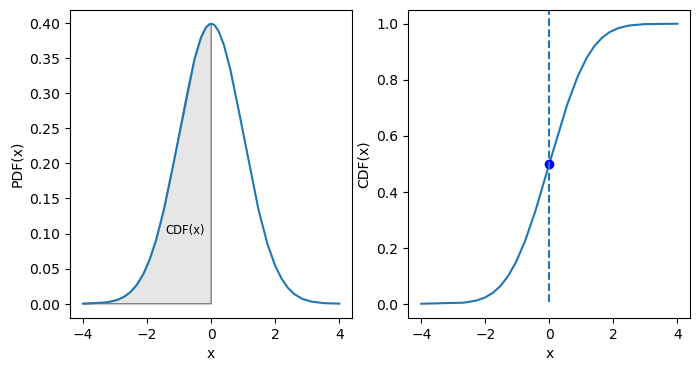

In [2]:
_, axes = plt.subplots(1, 2, figsize=(8, 4))

start, end = -4, 4
loc, scale = 0, 1
func = stats.norm(loc, scale)

x = np.linspace(start, end, 201)
y = func.pdf(x)

ix = np.linspace(start, loc)
iy = func.pdf(ix)

shade = [(start, 0), *zip(ix, iy), (loc, 0)]
polygon = patches.Polygon(shade, facecolor="0.9", edgecolor="0.5")
axes[0].plot(x, y)
axes[0].add_patch(polygon)

axes[0].text(
    0.2 * (start + loc),
    0.25 * func.pdf(loc),
    "CDF(x)",
    horizontalalignment="center",
    fontsize="small",
)
axes[0].set(xlabel="x", ylabel="PDF(x)")

y_ = func.cdf(x)
axes[1].plot(x, y_)
axes[1].plot(loc, func.cdf(loc), marker="o", color="b")

axes[1].axvline(x=0, ymin=0.05, ymax=1, ls="--")
axes[1].set(xlabel="x", ylabel="CDF(x)")

plt.show()

## 3. 常见离散分布

### 3.1. 二项分布

设试验 _E_ 只有 2 种可能结果 A 和 Ā，则称 _E_ 为 Bernoulli 试验，将此试验独立重复$n$次，即为$n$重 Bernoulli 试验（如放回抽样），其结果的发生概率服从 Bernoulli 分布，也叫 0-1 分布。

将后者的试验结果$X$扩展为 ℤ，则其中一个结果$k (k ∈ ℤ)$的发生概率$P\{X = k\}$服从二项分布

$$
P(X = k) = \binom{n}{k}p^{k}(1 - p)^{n - k}, k ∈ ℕ
$$

其名称源于，其 PMF 形式类似二项式定理

$$
(a + b)^{n} = ∑∑_{k=0}^{n}\binom{n}{k}a^{n - k}b^{k} (∀a, b ∈ ℝ, ∀n ∈ ℤ⁺)
$$

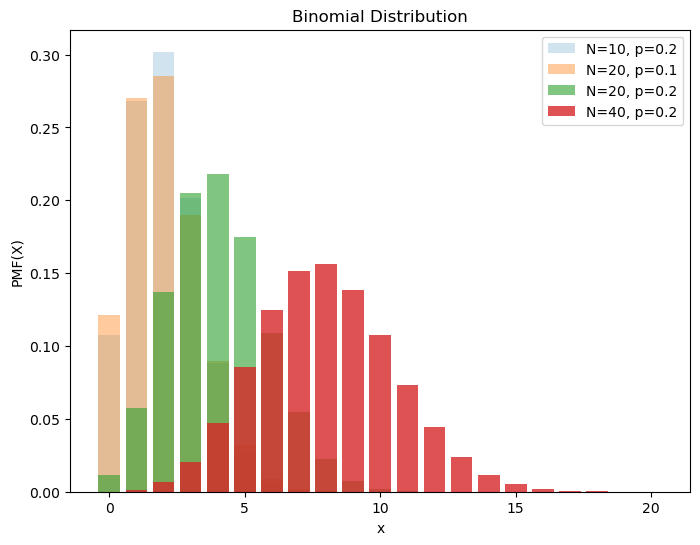

In [3]:
ns = [10, 20, 20, 40]
ps = [0.2, 0.1, 0.2, 0.2]
alphas = np.arange(1, len(ns) + 1) * 0.2

X = np.arange(0, 20 + 1)

_, ax = plt.subplots(figsize=(8, 6))

for n, p, alpha in zip(ns, ps, alphas):
    y = stats.binom(n=n, p=p).pmf(X)
    ax.bar(X, y, label=f"N={n}, p={p}", alpha=alpha)

ax.set(xlabel="x", ylabel="PMF(X)", title="Binomial Distribution")
ax.legend()

plt.show()

假如投一个正六面体的筛子 256 次，则得到 32 次 6 的概率，可由如下方式计算

In [4]:
def binomial_test(n, p, checkVal):
    p_oneTail = stats.binomtest(checkVal, n, p, alternative="greater")
    p_twoTail = stats.binomtest(checkVal, n, p)

    return (p_oneTail.pvalue, p_twoTail.pvalue)


n, p = 256, 1 / 6
checkVal = 64

p1, p2 = binomial_test(n, p, checkVal)
print(
    f'The chance that you roll {checkVal} or more "6" is {p1:5.3f}, and the chance of an event as extreme as {checkVal} or more rolls is {p2:5.3f}'
)

The chance that you roll 64 or more "6" is 0.000, and the chance of an event as extreme as 64 or more rolls is 0.001


### 3.2. 超几何分布

一批产品共$N$个，其中废品$M(⩽ N)$个。随机抽取$n$个，含$m$个废品的概率服从超几何分布，相当于不放回抽样的二项分布

$$
P(X = m) = \binom{N - M}{n - m} \binom{M}{m}/\binom{N}{n}
$$

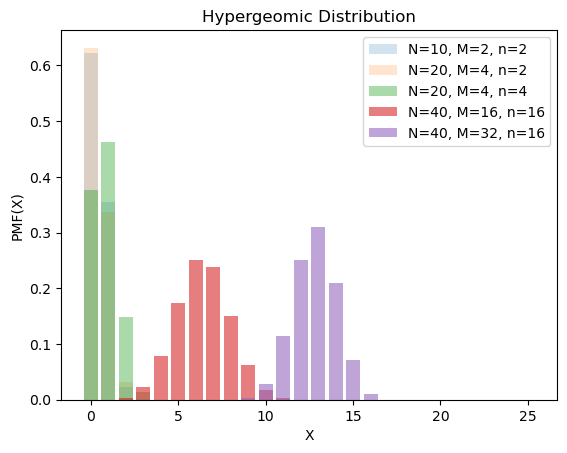

In [5]:
Ns = [10, 20, 20, 40, 40]
Ms = [2, 4, 4, 16, 32]
ns = [2, 2, 4, 16, 16]
alphas = [0.2, 0.2, 0.4, 0.6, 0.6]

_, ax = plt.subplots()

X = np.arange(0, 26, 1)
for N, M, n, alpha in zip(Ns, Ms, ns, alphas):
    y = stats.hypergeom(N, M, n).pmf(X)
    ax.bar(X, y, label=f"N={N}, M={M}, n={n}", alpha=alpha)

ax.set(xlabel="X", ylabel="PMF(X)", title="Hypergeomic Distribution")
ax.legend()

plt.show()

### 3.3. 几何分布

在$n$次 Bernoulli 试验中，第$k+1$次才第一次成功的机率服从几何分布，记作$X ∼ G(p)$，也可以理解成连续失败$k$次的概率分布。

$$
P(X = k) = p(1-p)^k, k ∈ ℕ
$$

几何分布得名于几何级数：

$$
G = ∑_{i=0}^{n} r^{i} = \frac{1 - r^{n + 1}}{1 - r},\ r ≠ 1
$$

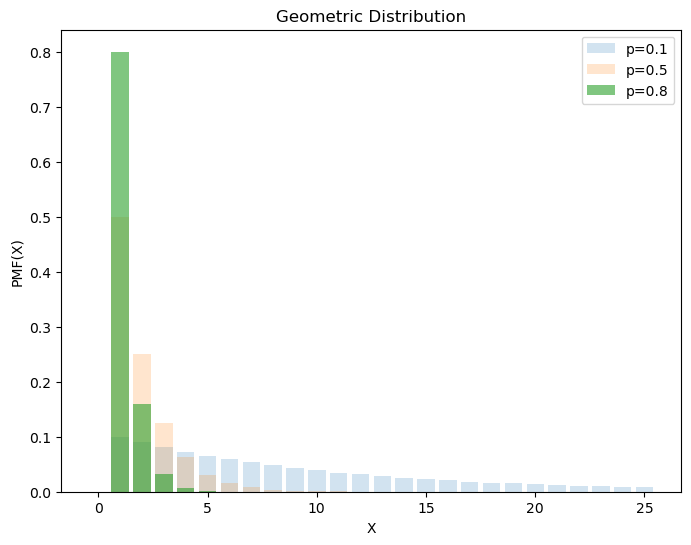

In [6]:
ps = [0.1, 0.5, 0.8]
alphas = [0.2, 0.2, 0.6]

X = np.arange(0, 26, 1)

_, ax = plt.subplots(figsize=(8, 6))

for p, alpha in zip(ps, alphas):
    y = stats.geom(p=p).pmf(X)
    ax.bar(X, y, label=f"p={p}", alpha=alpha)

ax.set(xlabel="X", ylabel="PMF(X)", title="Geometric Distribution")
ax.legend()

plt.show()

### 3.4. 负二项分布

已知合格率为$p$时，进行$n$次实验，抽到合格品$r$个，服从分布负二项分布，即重复$n$次的几何分布

$$
P(X = k) = \binom{k + r - 1}{r - 1}p^{r}(1 - p)^{k}
$$

此分布得名于负二项展开式

$$
(1 - x)^{-n} = ∑_0^{∞} \binom{i + n + 1}{n + 1} x^{n}
$$

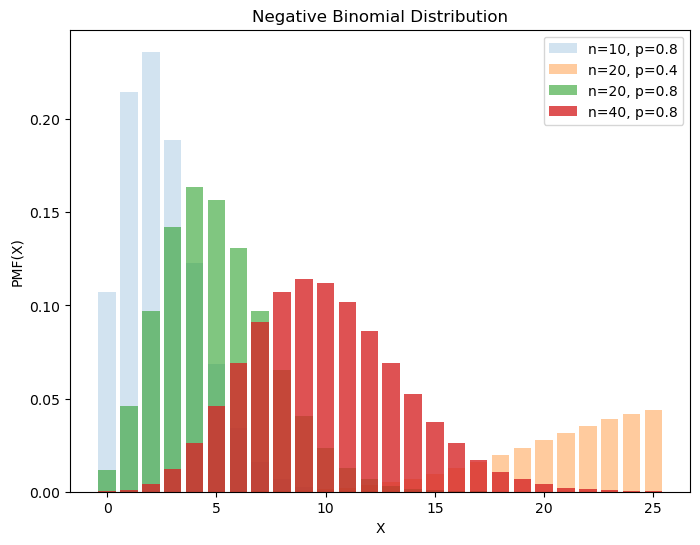

In [7]:
ns = [10, 20, 20, 40]
ps = [0.8, 0.4, 0.8, 0.8]
alphas = np.arange(1, len(ns) + 1) * 0.2

X = np.arange(0, 26, 1)

_, ax = plt.subplots(figsize=(8, 6))

for n, p, alpha in zip(ns, ps, alphas):
    y = stats.nbinom(n=n, p=p).pmf(X)
    ax.bar(X, y, label=f"n={n}, p={p}", alpha=alpha)

ax.set(xlabel="X", ylabel="PMF(X)", title="Negative Binomial Distribution")
ax.legend()

plt.show()

> 当$r$为整数时，又称 Pascal 分布。

### 3.5. Poisson 分布

Poisson 分布用于描述单位时间内随机事件发生的次数。将时间切分为$n$个时段，设某事件的总发生次数为$λ$，则一个时段内该事件发生的概率为$p= λ/n$，代入二项分布，

$$
P(X = k) = \binom{n}{k}\big(\dfrac{λ}{n}\big)^{k}\big(1-\dfrac{λ}{n}\big)^{n - i}
$$

当$n → ∞$

$$
\binom{n}{k}/n^{k} → 1/k!
$$

$$
\big(1 - \frac{λ}{n}\big)^{n} → e^{-λ}
$$

得

$$
P(X = k) = e^{-λ}⋅\frac{λ^{k}}{k!}, k ∈ ℕ
$$

- Poisson 分布的均值、方差具有**线性可加性**。

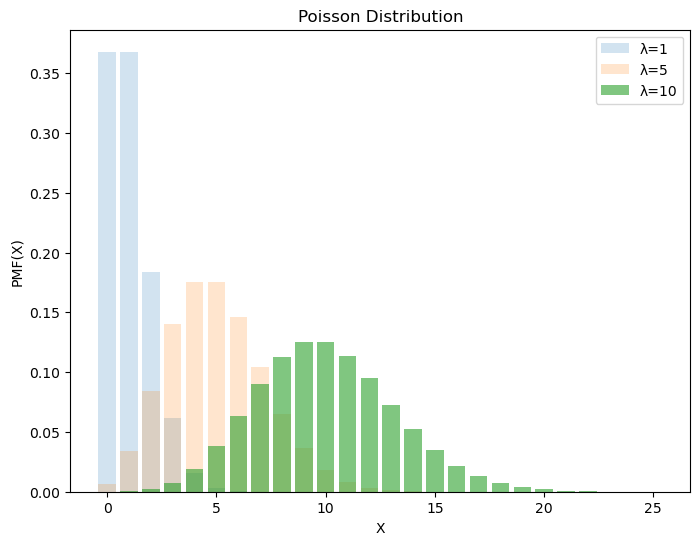

In [8]:
λs = [1, 5, 10]
alphas = [0.2, 0.2, 0.6]

X = np.arange(0, 26, 1)

_, ax = plt.subplots(figsize=(8, 6))

for λ, alpha in zip(λs, alphas):
    y = stats.poisson(mu=λ).pmf(X)
    ax.bar(X, y, label=f"λ={λ}", alpha=alpha)

ax.set(xlabel="X", ylabel="PMF(X)", title="Poisson Distribution")
ax.legend()

plt.show()

### 3.6. 小结

|    离散分布    |     表示     |  结果取值  |    常见情况    |
| :------------: | :----------: | :--------: | :------------: |
| Bernoulli 分布 |  $Bern(p)$   | $\{0, 1\}$ | 单样本互斥事件 |
|    二项分布    |  $B(n, p)$   |     ℤ      | 多样本互斥事件 |
|   超几何分布   | $H(N, m, n)$ |     ℤ      | 不放回二项分布 |
|  Poisson 分布  |   $Pois(λ)$   |     ℤ      |   小概率事件   |

1. 当$n ≥ 20, p ⩽ 0.05$，$B(n, p) → Pois(λ)$
2. 当$np ≥ 5$，$B(n, p) → 𝒩(np, np(1 - p))$
3. 当$λ ≥ 20$，$Pois(λ) → 𝒩(λ, λ)$
4. 当$N → ∞$，$H(N, m, n) → B(n, p)$（当$n$固定，则$p=M/N$固定）

## 4. 常见连续分布


### 4.1. 指数分布

指数分布表示 Poisson 过程中的事件的时间间隔。可以看作是逆 Poisson 分布。

> 逆分布（inverse distribution）是随机变量的倒数服从的分布。

概率密度函数

$$
f(x, λ) =
\begin{cases}
  λe^{-λx}, & x ≥ 0\\
  0, & x < 0
\end{cases}
$$

其中，$λ > 0$，是分布的参数，即每单位时间发生该事件的次数。

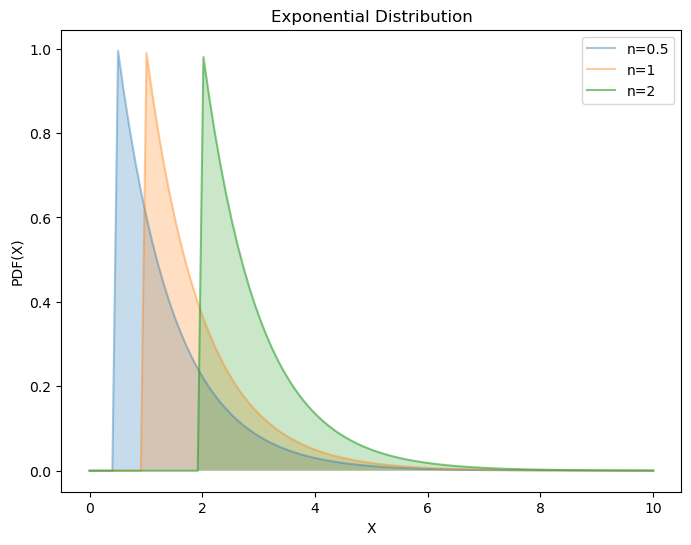

In [9]:
locs = [0.5, 1, 2]
alphas = [0.4, 0.4, 0.6]

X = np.linspace(0, 10, 100)

_, ax = plt.subplots(figsize=(8, 6))

for loc, alpha in zip(locs, alphas):
    y = stats.expon.pdf(X, loc=loc)
    ax.plot(X, y, label=f"n={loc}", alpha=alpha)
    ax.fill_between(X, y, alpha=0.25)

ax.set(xlabel="X", ylabel="PDF(X)", title="Exponential Distribution")
ax.legend()

plt.show()


- 无记忆性

$$
∀s, \ t ≥ 0 ⇒ P(X > s + t | X > s) = P(T > t)
$$


### 4.2. Gaussian 分布

Gaussian 分布或 Gaussian 分布是所有分布函数中最重要的。这是由于所有分布函数的均值在足够大的样本数下都近似于 Gaussian 分布。

概率密度函数

$$
f(x) = \frac{1}{\sqrt{2π} σ} e^{-\frac{(x - μ)^2}{2 σ^2}}
$$

> 该式由 de Moivre-LaPlace 中心极限定理首先给出，详见第二章。

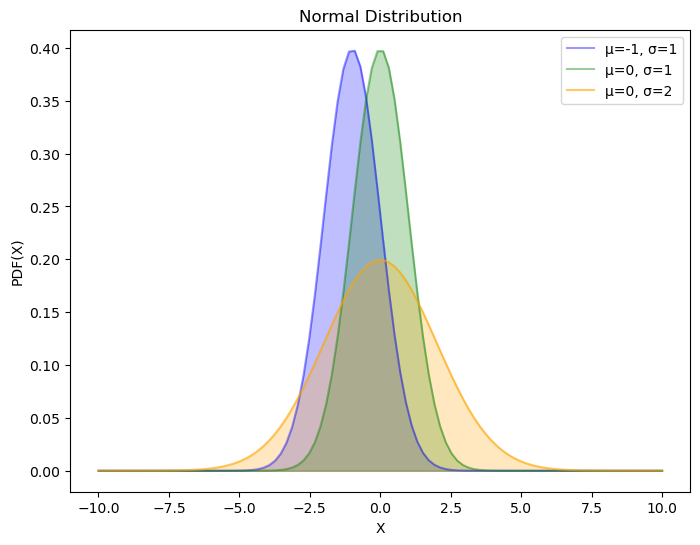

In [10]:
locs = [-1, 0, 0]
scales = [1, 1, 2]
colors = ["blue", "green", "orange"]
alphas = [0.4, 0.4, 0.6]

X = np.linspace(-10, 10, 100)

_, ax = plt.subplots(figsize=(8, 6))

for loc, scale, color, alpha in zip(locs, scales, colors, alphas):
    y = stats.norm(loc=loc, scale=scale).pdf(X)
    ax.plot(X, y, label=f"μ={loc}, σ={scale}", color=color, alpha=alpha)
    ax.fill_between(X, y, color=color, alpha=0.25)

ax.set(xlabel="X", ylabel="PDF(X)", title="Normal Distribution")
ax.legend()

plt.show()

### 4.3. 对数 Gaussian 分布

数据的对数正态变换通常用于将高偏度分布变换为 Gaussian 分布。

$$
f(x, s) = \frac{1}{s x \sqrt{2π}} \exp{\big(-\frac{\log^2(x)}{2 s^2}\big)}
$$

其中，$s$为形状参数。

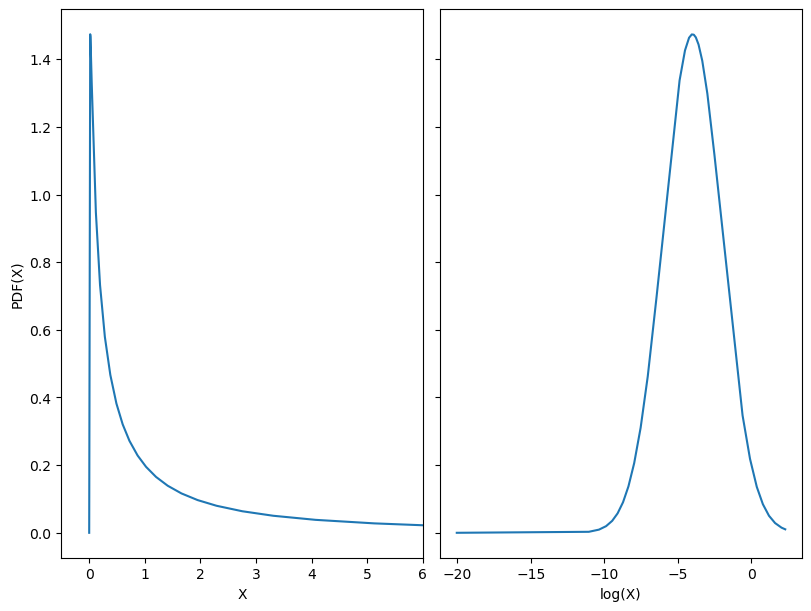

In [11]:
x = np.logspace(-9, 1, 1001) + 1e-9
func = stats.lognorm(2)
y = func.pdf(x)

_, axes = plt.subplots(1, 2, figsize=(8, 6), sharey=True, constrained_layout=True)

axes[0].plot(x, y)
axes[0].set(xlim=(-0.5, 6), xlabel="X", ylabel="PDF(X)")

axes[1].plot(np.log(x), y)
axes[1].set(xlabel="log(X)")

plt.show()

### 4.4. 均匀分布

概率密度函数

$$
\begin{cases}
  \dfrac{1}{b - a}, & x ∈ (a, b) \\
  0, & x ∉ (a, b)
\end{cases}
$$

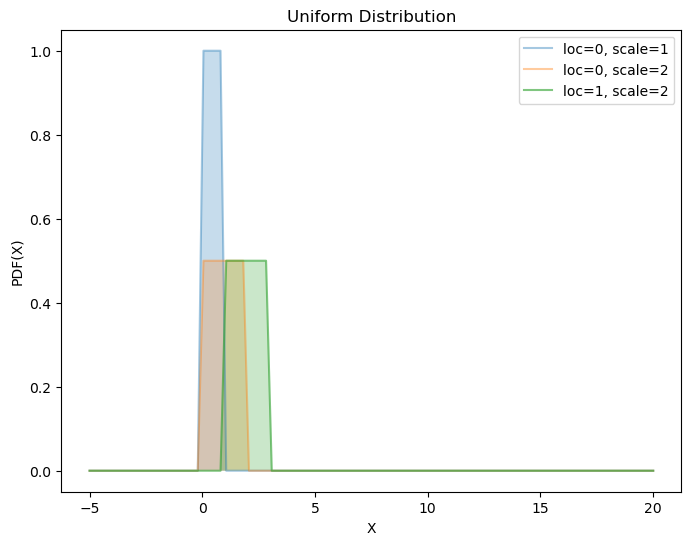

In [12]:
locs = [0, 0, 1]
scales = [1, 2, 2]
alphas = [0.4, 0.4, 0.6]

X = np.linspace(-5, 20, 100)

_, ax = plt.subplots(figsize=(8, 6))

for loc, scale, alpha in zip(locs, scales, alphas):
    y = stats.uniform(loc=loc, scale=scale).pdf(X)
    ax.plot(X, y, label=f"loc={loc}, scale={scale}", alpha=alpha)
    ax.fill_between(X, y, alpha=0.25)

ax.set(xlabel="X", ylabel="PDF(X)", title="Uniform Distribution")
ax.legend()

plt.show()